<a href="https://colab.research.google.com/github/freida20git/child-age-classification/blob/main/bert_finetuning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/age classification/clean_kids_Dataset_Ver01_childtext_and_age_forFreida_MORE_COLs.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,child_text,child_age,child_name,conversation,child_gender,corpus_name,file_name,child_group
0,I got the UNRECOGNIZED_WORD Barbie. I like tha...,61.0,Fletcher_Claire_K,"[('INV', 'this is something my sister got for ...",female,Fletcher,ChildCorpus/Eng-UK/Fletcher/5/hnclak.cha,TD
1,what?. that one?. no. I want cookie. I want co...,30.0,Morisset_Jenny,"[('MOT', 'look Lovey'), ('CHI', 'what?'), ('MO...",female,Morisset,ChildCorpus/Eng-NA/Morisset/Seattle/823m30.cha,"cross, toyplay, TD"
2,my open it up. a mirror. can't see anything?. ...,29.0,Tommerdahl_ECG,"[('MOT', ""what've you got there?""), ('CHI', 'm...",female,Tommerdahl,ChildCorpus/Eng-UK/Tommerdahl/ECG2.cha,"cross, toyplay, TD"
3,um. Mommy I can't read!. I don't know. no UNRE...,67.0,HSLLD_trire,"[('INV', 'okay you can just tell me the story ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV3/RE/trire3.cha,"long, reading, TD"
4,and the and the annnnd and then I saw what hap...,71.0,Hicks_Julia,"[('EXP', 'okay this is Julia and Deborah for t...",female,Hicks,ChildCorpus/Eng-NA/Hicks/Kinder/report/rep053.cha,"cross, narrative, TD"
...,...,...,...,...,...,...,...,...
1826,mhm. UNRECOGNIZED_WORD. leaf. mhm. what this?....,45.0,HSLLD_zenbr,"[('MOT', 'okay'), ('MOT', 'this is called the ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/zenbr1.cha,"long, book, TD"
1827,yeah. I wanna drink of water. toys in there?. ...,30.0,Morisset_Jeremiah,"[('MOT', 'you hungry?'), ('CHI', 'yeah'), ('MO...",male,Morisset,ChildCorpus/Eng-NA/Morisset/Topeka/184m30t.cha,"cross, toyplay, TD"
1828,yeah!. head. eyes!. nose!. ears!. what?. yeah!...,46.0,HSLLD_maybr,"[('MOT', ""it looks like a little worm but I th...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/maybr1.cha,"long, book, TD"
1829,UNRECOGNIZED_WORD. yeah. no. yeah. a bunny. an...,29.0,NewEngland_Erin,"[('MOT', 'look'), ('MOT', 'look'), ('CHI', 'UN...",female,NewEngland,ChildCorpus/Eng-NA/NewEngland/32/04.cha,TD


# EDA, dividing to classes according to age ranges, train/val/test sets and filtering:

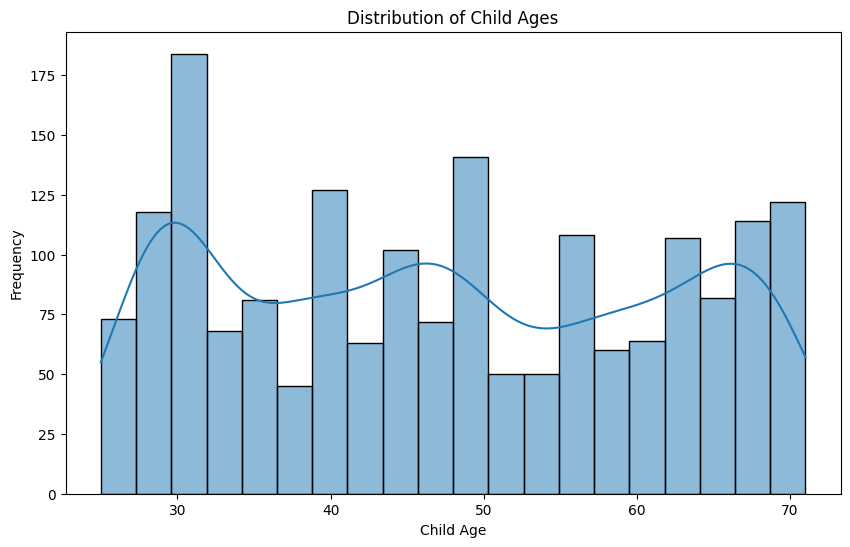

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram of child ages
plt.figure(figsize=(10, 6))
sns.histplot(df['child_age'].dropna(), kde=True, bins=20)
plt.title('Distribution of Child Ages')
plt.xlabel('Child Age')
plt.ylabel('Frequency')
plt.show()

we could divide:

Range 1:  24-36  (Toddler: 2-3 years)

Range 2:  37-48  (Preschool 3-4 years)

Range 3:  49-72  (Older child: 4-6 years)


In [ ]:
bins = [24, 36, 48, 72]
labels = ["2_3", "3_4", "4_6"]

# Create the new column
df["class_range"] = pd.cut(df["child_age"], bins=bins, labels=labels, right=True)


In [ ]:
df

,child_text,child_age,child_name,conversation,child_gender,corpus_name,file_name,child_group,class_range
0,I got the UNRECOGNIZED_WORD Barbie. I like tha...,61.0,Fletcher_Claire_K,"[('INV', 'this is something my sister got for ...",female,Fletcher,ChildCorpus/Eng-UK/Fletcher/5/hnclak.cha,TD,4_6
1,what?. that one?. no. I want cookie. I want co...,30.0,Morisset_Jenny,"[('MOT', 'look Lovey'), ('CHI', 'what?'), ('MO...",female,Morisset,ChildCorpus/Eng-NA/Morisset/Seattle/823m30.cha,"cross, toyplay, TD",2_3
2,my open it up. a mirror. can't see anything?. ...,29.0,Tommerdahl_ECG,"[('MOT', ""what've you got there?""), ('CHI', 'm...",female,Tommerdahl,ChildCorpus/Eng-UK/Tommerdahl/ECG2.cha,"cross, toyplay, TD",2_3
3,um. Mommy I can't read!. I don't know. no UNRE...,67.0,HSLLD_trire,"[('INV', 'okay you can just tell me the story ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV3/RE/trire3.cha,"long, reading, TD",4_6
4,and the and the annnnd and then I saw what hap...,71.0,Hicks_Julia,"[('EXP', 'okay this is Julia and Deborah for t...",female,Hicks,ChildCorpus/Eng-NA/Hicks/Kinder/report/rep053.cha,"cross, narrative, TD",4_6
...,...,...,...,...,...,...,...,...,...
1826,mhm. UNRECOGNIZED_WORD. leaf. mhm. what this?....,45.0,HSLLD_zenbr,"[('MOT', 'okay'), ('MOT', 'this is called the ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/zenbr1.cha,"long, book, TD",3_4
1827,yeah. I wanna drink of water. toys in there?. ...,30.0,Morisset_Jeremiah,"[('MOT', 'you hungry?'), ('CHI', 'yeah'), ('MO...",male,Morisset,ChildCorpus/Eng-NA/Morisset/Topeka/184m30t.cha,"cross, toyplay, TD",2_3
1828,yeah!. head. eyes!. nose!. ears!. what?. yeah!...,46.0,HSLLD_maybr,"[('MOT', ""it looks like a little worm but I th...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/maybr1.cha,"long, book, TD",3_4
1829,UNRECOGNIZED_WORD. yeah. no. yeah. a bunny. an...,29.0,NewEngland_Erin,"[('MOT', 'look'), ('MOT', 'look'), ('CHI', 'UN...",female,NewEngland,ChildCorpus/Eng-NA/NewEngland/32/04.cha,TD,2_3


dividing into train validation and test with no child names overlapping in the sets so theres no leakege in test/evaluation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Get unique children
unique_children = df["child_name"].unique()

# Split children into train (60%) and temp (40%)
train_children, temp_children = train_test_split(unique_children, test_size=0.4, random_state=42)

# Split temp into validation (20%) and test (20%)
val_children, test_children = train_test_split(temp_children, test_size=0.5, random_state=42)

# Assign rows to splits based on child_name
train_df = df[df["child_name"].isin(train_children)].reset_index(drop=True)
val_df   = df[df["child_name"].isin(val_children)].reset_index(drop=True)
test_df  = df[df["child_name"].isin(test_children)].reset_index(drop=True)

# sanity check
assert set(train_df["child_name"]).isdisjoint(val_df["child_name"])
assert set(train_df["child_name"]).isdisjoint(test_df["child_name"])
assert set(val_df["child_name"]).isdisjoint(test_df["child_name"])

print("Number of children in each split:")
print("Train:", train_df["child_name"].nunique())
print("Validation:", val_df["child_name"].nunique())
print("Test:", test_df["child_name"].nunique())

print("Number of rows in each split:")
print("Train:", len(train_df))
print("Validation:", len(val_df))
print("Test:", len(test_df))


Number of children in each split:
Train: 661
Validation: 221
Test: 221
Number of rows in each split:
Train: 1096
Validation: 385
Test: 350


In [ ]:
train_df

,child_text,child_age,child_name,conversation,child_gender,corpus_name,file_name,child_group,class_range
0,I got the UNRECOGNIZED_WORD Barbie. I like tha...,61.0,Fletcher_Claire_K,"[('INV', 'this is something my sister got for ...",female,Fletcher,ChildCorpus/Eng-UK/Fletcher/5/hnclak.cha,TD,4_6
1,what?. that one?. no. I want cookie. I want co...,30.0,Morisset_Jenny,"[('MOT', 'look Lovey'), ('CHI', 'what?'), ('MO...",female,Morisset,ChildCorpus/Eng-NA/Morisset/Seattle/823m30.cha,"cross, toyplay, TD",2_3
2,and the and the annnnd and then I saw what hap...,71.0,Hicks_Julia,"[('EXP', 'okay this is Julia and Deborah for t...",female,Hicks,ChildCorpus/Eng-NA/Hicks/Kinder/report/rep053.cha,"cross, narrative, TD",4_6
3,I w I wan a read it. no!. a moon. the sky. a c...,45.0,HSLLD_donbr,"[('CHI', 'I w I wan a read it'), ('MOT', 'can ...",male,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/donbr1.cha,"long, book, TD",3_4
4,um uh a doggie. um UNRECOGNIZED_WORD. um. um a...,25.0,Demetras2_Tim,"[('FAT', ""what's that one?""), ('CHI', 'um uh a...",male,Demetras2,ChildCorpus/Eng-NA/Demetras2/Tim/father/020130...,TD,2_3
...,...,...,...,...,...,...,...,...,...
1091,yeah. hi. yeah. my sister is Zoey. she is thre...,38.0,Weist_Benjamin,"[('MOT', ""this is the first tape we're making ...",NaN,Weist,ChildCorpus/Eng-NA/Weist/Ben/030221.cha,"long, toyplay, TD",3_4
1092,I opened Skipper after. I was playin with her ...,48.0,HSLLD_trier,"[('MOT', 'can you tell us about your birthday?...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/ER/trier1.cha,"long, narrative, TD",3_4
1093,mhm. UNRECOGNIZED_WORD. leaf. mhm. what this?....,45.0,HSLLD_zenbr,"[('MOT', 'okay'), ('MOT', 'this is called the ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/zenbr1.cha,"long, book, TD",3_4
1094,yeah. I wanna drink of water. toys in there?. ...,30.0,Morisset_Jeremiah,"[('MOT', 'you hungry?'), ('CHI', 'yeah'), ('MO...",male,Morisset,ChildCorpus/Eng-NA/Morisset/Topeka/184m30t.cha,"cross, toyplay, TD",2_3


filter non relevant columns:

In [ ]:
# Define the columns to keep
columns_to_keep = [ "child_text", "class_range"]

# Keep only those columns
train_df = train_df[columns_to_keep].copy()
val_df   = val_df[columns_to_keep].copy()
test_df  = test_df[columns_to_keep].copy()

# check columns
print("Train columns:", train_df.columns.tolist())
print("Validation columns:", val_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())


Train columns: ['child_text', 'class_range']
Validation columns: ['child_text', 'class_range']
Test columns: ['child_text', 'class_range']


In [ ]:
import os
train_df.to_csv(os.path.join("/content/drive/MyDrive/age classification/train.csv"), index=False)
val_df.to_csv(os.path.join("/content/drive/MyDrive/age classification/validation.csv"), index=False)
test_df.to_csv(os.path.join("/content/drive/MyDrive/age classification/test.csv"), index=False)

print("Datasets saved successfully!")

Datasets saved successfully!


Start tokenization and training:


In [ ]:
# Install Pytorch & other libraries
%pip install "torch==2.5.0" "torchvision==0.20.0"
%pip install "setuptools<71.0.0" scikit-learn

# Install Hugging Face libraries
%pip install  --upgrade \
  "datasets==3.1.0" \
  "accelerate==1.2.1" \
  "hf-transfer==0.1.8"

# ModernBERT is not yet available in an official release, so we need to install it from github
%pip install "git+https://github.com/huggingface/transformers.git@6e0515e99c39444caae39472ee1b2fd76ece32f1" --upgrade


# Data and tokenization:

In [ ]:
!pip install datasets transformers --quiet

In [ ]:

from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
import torch


In [ ]:
model_name = "prajjwal1/bert-tiny"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model for classification with 3 labels
num_labels = 3
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AutoConfig, AutoModel

model_name = "prajjwal1/bert-tiny"  # or any model
config = AutoConfig.from_pretrained(model_name)


In [ ]:
print("Hidden dropout:", config.hidden_dropout_prob)
print("Attention dropout:", config.attention_probs_dropout_prob)
print("Number of layers:", config.num_hidden_layers)


Hidden dropout: 0.1
Attention dropout: 0.1
Number of layers: 2


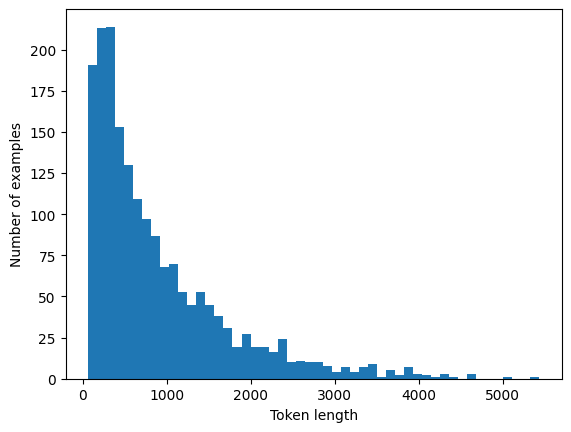

Max tokens: 5434
Median tokens: 629.0


In [ ]:
token_lengths = [len(tokenizer.encode(text)) for text in df['child_text']]
import matplotlib.pyplot as plt

plt.hist(token_lengths, bins=50)
plt.xlabel("Token length")
plt.ylabel("Number of examples")
plt.show()

print("Max tokens:", max(token_lengths))
print("Median tokens:", np.median(token_lengths))


In [ ]:
def tokenize_function(examples):
    return tokenizer(
        examples["child_text"],
        padding="max_length",  # pad to max_length
        truncation=True,       # truncate longer text
        max_length=512          # adjust if needed
    )


In [ ]:
data_path = "/content/drive/MyDrive/age classification/"

dataset = load_dataset('csv',
                       data_files={
                           'train': os.path.join(data_path, 'train.csv'),
                           'validation': os.path.join(data_path, 'validation.csv'),
                           'test': os.path.join(data_path, 'test.csv')
                       })


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
# Map tokenization over dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)



Map:   0%|          | 0/1096 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

In [ ]:
label_map = {"2_3": 0, "3_4": 1, "4_6": 2}

def encode_labels(example):
    example["labels"] = label_map[example["class_range"]]
    return example

tokenized_datasets = tokenized_datasets.map(encode_labels)


Map:   0%|          | 0/1096 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


# Training:

## **Freeze BERT first (train only classifier head):**

In [ ]:
for param in model.bert.parameters():
    param.requires_grad = False

In [ ]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # log at the end of each epoch
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=30,
    learning_rate=5e-5,
    load_best_model_at_end=True,
    report_to=[]  # disables W&B
)

early_stopping = EarlyStoppingCallback(early_stopping_patience=2)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.009500,0.985135,0.542857,0.465131
2,0.949900,0.887496,0.618182,0.523284
3,0.874500,0.823255,0.651948,0.562679
4,0.794200,0.751912,0.698701,0.651381
5,0.716400,0.720006,0.693506,0.661063
6,0.665300,0.688432,0.688312,0.660118
7,0.612000,0.663392,0.724675,0.692559
8,0.573500,0.654524,0.709091,0.689812
9,0.528000,0.664367,0.688312,0.685225
10,0.491400,0.656132,0.709091,0.697346


TrainOutput(global_step=690, training_loss=0.7214873272439708, metrics={'train_runtime': 21.5477, 'train_samples_per_second': 1525.919, 'train_steps_per_second': 96.066, 'total_flos': 13928881274880.0, 'train_loss': 0.7214873272439708, 'epoch': 10.0})

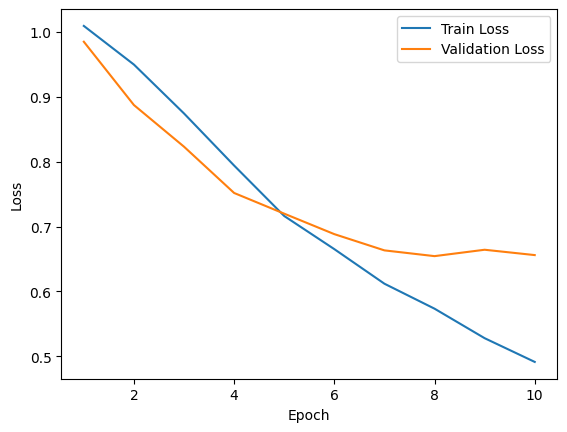

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

logs = pd.DataFrame(trainer.state.log_history)

# Extract only train and eval losses
train_logs = logs[logs['loss'].notna()]
eval_logs = logs[logs['eval_loss'].notna()]

plt.plot(train_logs['epoch'], train_logs['loss'], label='Train Loss')
plt.plot(eval_logs['epoch'], eval_logs['eval_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **Unfreeze BERT and train whole model:+**

In [ ]:
for param in model.bert.parameters():
    param.requires_grad = True

trainer.args.learning_rate = 2e-5 # use lower learning rate (e.g., 2e-5) for stability
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.536900,0.675852,0.670130,0.664279
2,0.491100,0.657119,0.706494,0.700004
3,0.428800,0.648212,0.714286,0.704640
4,0.398000,0.679717,0.685714,0.685154
5,0.352500,0.688972,0.727273,0.718969


TrainOutput(global_step=345, training_loss=0.44148691702580106, metrics={'train_runtime': 10.4338, 'train_samples_per_second': 3151.293, 'train_steps_per_second': 198.393, 'total_flos': 6964440637440.0, 'train_loss': 0.44148691702580106, 'epoch': 5.0})

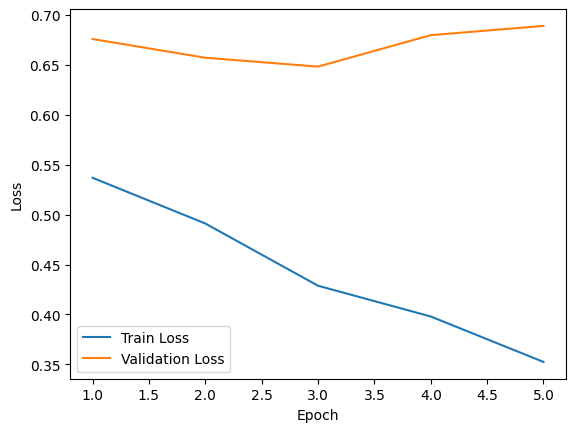

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

logs = pd.DataFrame(trainer.state.log_history)

# Extract only train and eval losses
train_logs = logs[logs['loss'].notna()]
eval_logs = logs[logs['eval_loss'].notna()]

plt.plot(train_logs['epoch'], train_logs['loss'], label='Train Loss')
plt.plot(eval_logs['epoch'], eval_logs['eval_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
